In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import NuSVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\abhig\Desktop\My internships\TATA Steel VT\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Next step is to find the unique values in all the columns of the dataset.

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [7]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [8]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [10]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [12]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [13]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

Now, we examine the columns. 
To do this, I will print a count of data samples of the categories under the features.

In [14]:
#using groupby command, we group by our dataframe by area_type and then aggregate the count
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [15]:
df.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [16]:
df.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [17]:
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

I want to keep my model as simple as possible so for doing that i will drop certain columns from the dataset.

As such, all columns are useful but using the domain knowledge, I assume columns like "Society", "Balcony" and "Availability" are not so important in deciding the final price.

In [18]:
#dropping the columns
df2 = df.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [19]:
df2.shape

(13320, 5)

Now we start the Data Cleaning process:
Handling NA values

In [20]:
df2.isnull().sum() #this tells you the number of rows where a particular column is NA

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [21]:
df2.shape

(13320, 5)

To handle these values, there is a way to drop the NA values.
If you don't want to drop the columns, The other way is to fill the NA values using the median of that particular column.
for ex: In "Bathroom", if we do not want to drop the NA values, we can calculate the median of the bathroom values and fill the NA values with that median.

But since my dataset contains 13000 rows and NA rows are pretty small in number so we can safely drop it from the dataset.

In [22]:
#dropping all NA values 
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [23]:
df3.shape

(13246, 5)

Now, we observe that in the "size" feature that some values are "BHK" like 2 BHK, 3 BHK etc. while some values are "bedroom" like 4 Bedroom, 3 Bedroom etc. 

In [24]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

According to the above unique values under "size", we see that there are values like "4 Bedroom" and "4 BHK" which are essentially the same.
To handle these columns, we will create a new column based on size column and apply a function to it that will tokenize the string making it easy for us to work with the "BHK" values.

In [25]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) #creating a new column and toknenizing the bhk values
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

Now we explore the total_sqft column.

In [27]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We need to check if these values of total sqft as a single number.
we can see that there is a value like "1133-1384". To convert it into a single number we take the average of these 2 numbers.

But first, I will explore the variations is there in the total sqft feature. By that i can detect if a given value under this column is float or not.

In [28]:
#defining a function that will convert a value in total_sqft column into float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
#since i want values where it is not a valid float number, we do the negate operation

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


We now observe that there are some non-uniformities in the data like 34.46Sq. Meter or 4125Perch. I am going to drop such cases to keep things simple.
Above also shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. 

For this, we define a function that will take a range as an input and returns the average value

In [30]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
convert_sqft_to_num('2100')

2100.0

In [32]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [33]:
convert_sqft_to_num('34.46Sq. Meter')

In [34]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,545.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [35]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [36]:
(2100+2850)/2

2475.0

In [37]:
df5 = df4.copy()
df5

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In real estate market, price per sqft is very important and it can be helpful for outlier detection in the future.
So we create a new column named "price_per_sqft".

In [38]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


We will now explore the "Location" column.
The point to be noted here is that Location is a categorical feature here.

In [39]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [40]:
len(df5.location.unique())

1304

Since there are around 1300 locations which is too much. This will make it difficult because during the time of one hot encoding, we will have 1300 columns which will be too many features. In short, its a high dimensionality problem.

To overcome this, we will reduce the dimensionality by coming up with other category. It means that if you have 1300 locations as it is shown above. There will be many locations that will be having only one or two data points. We will find those locations.

In [41]:
df5.location = df5.location.apply(lambda x: x.strip()) #stripping extra spaces from the location so that my data is clean

location_stats = df5.groupby('location')['location'].value_counts(ascending=False) #gathering statistics from the "location" column
location_stats

location                                         location                                       
1 Annasandrapalya                                1 Annasandrapalya                                  1
1 Giri Nagar                                     1 Giri Nagar                                       1
1 Immadihalli                                    1 Immadihalli                                      1
1 Ramamurthy Nagar                               1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage  12th cross srinivas nagar banshankari 3rd stage    1
                                                                                                   ..
t.c palya                                        t.c palya                                          1
tc.palya                                         tc.palya                                           4
vinayakanagar                                    vinayakanagar                         

Above we see that places like Annasandrapalya, Ramamurthy Nagar, Giri Nagar have only one data row.
i want to sort these locations by number of data points.

In [42]:
#gathering statistics from the "location" column and sorting them by number of data points
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

Looking at the above statistics, we may come up with a conclusion that any location that is having less than 10 data points will be called other locations.

In [43]:
len(location_stats[location_stats<=10])

1052

In [44]:
#identifying the locations having less than 10 data points
location_having_less_than_10_points = location_stats[location_stats<=10]
location_having_less_than_10_points

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [45]:
len(df5.location.unique())

1293

In [46]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_having_less_than_10_points else x)
len(df5.location.unique())

242

So, before transforming the dataset, we had 1293 locations but after converting the said locations into the other locations, we are left with 242 locations. This is pretty good as it is easy for us now to do one hot encoding.

In [47]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,545.00,4,16515.151515
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Detection and Removal


As a data scientist when you have a conversation with your real estate business manager, if he will tell you that normally square ft per bedroom is 300 that means 2 BHK is minimum 600 sqft. But what if you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 

As per the renowned definition, an Outlier is an observation point that is distant from other observations. Basically these are the observations/data points that has a different underlying behaviour than the rest of the data.

We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft(assumed)

In [48]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,545.00,4,16515.151515
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


One of the things that i know about real estate is that a 2 BHK House cannot be something like 500 sqft.
however, in the dataset, the column 0 says otherwise.

From above, the size is 2 BHK but the total sqft is 1056. If we divide that we get 500 sqft approx. which is not possible.

By using this knowledge, we examine the situation using a threshold value of 300 sqft.(Assumed)

In [49]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [50]:
df5.shape

(13246, 7)

In [51]:
#creating a new dataframe from which all the outliers as shown above
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

This was one kind of outlier. There may be many more like this. Let's see price per sqft i.e. all those properties that have either very high or very low price per sqft.

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.369022
std        4167.772890
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. 
I should remove outliers per location using mean and one standard deviation

In [53]:
def pps_outliers(df): #creating the function
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #grouping the values by location
        m = np.mean(subdf.price_per_sqft) #calculating mean
        st = np.std(subdf.price_per_sqft) #calculating standard deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #filtering points beyond standard deviation
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = pps_outliers(df6)
df7.shape

(10242, 7)

Now, we check if the properties like 3BHK have a higher price than 2BHK for the same sqft area in our dataset.


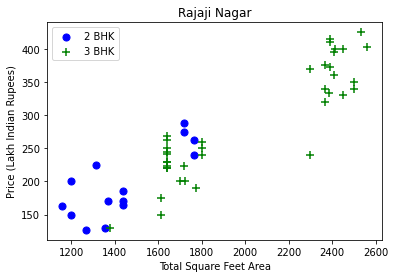

In [54]:
import matplotlib
def plot_scatter_chart(df,location): #drawing a scatterplot
    bhk2 = df[(df.location==location) & (df.bhk==2)] #first plot of 2 bedrooms
    bhk3 = df[(df.location==location) & (df.bhk==3)] #second plot of 3 bedrooms
    matplotlib.rcParams['figure.figsize'] = (15,10)
    #code to derive the scatterplot figure
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

We notice in the above graph that the 1700 sqft area has 2BHK prices higher than 3BHK. So it is very necessary to remove these outliers.

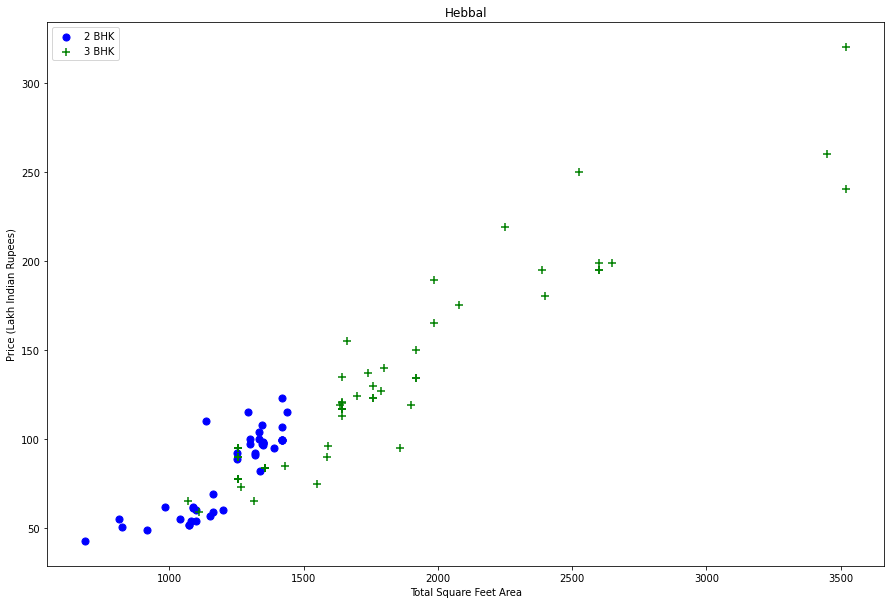

In [55]:
plot_scatter_chart(df7,"Hebbal")

In the location "Hebbal", we see the same observation. So we remove properties where for same location, the price of 3BHK is less than 2BHK. 
What we will do is for a given location, we will build a dictionary of stats per BHK so that we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7330, 7)

After the removal of these outliers, we again plot the scatterplot for the location "Hebbal" to see the improvement.

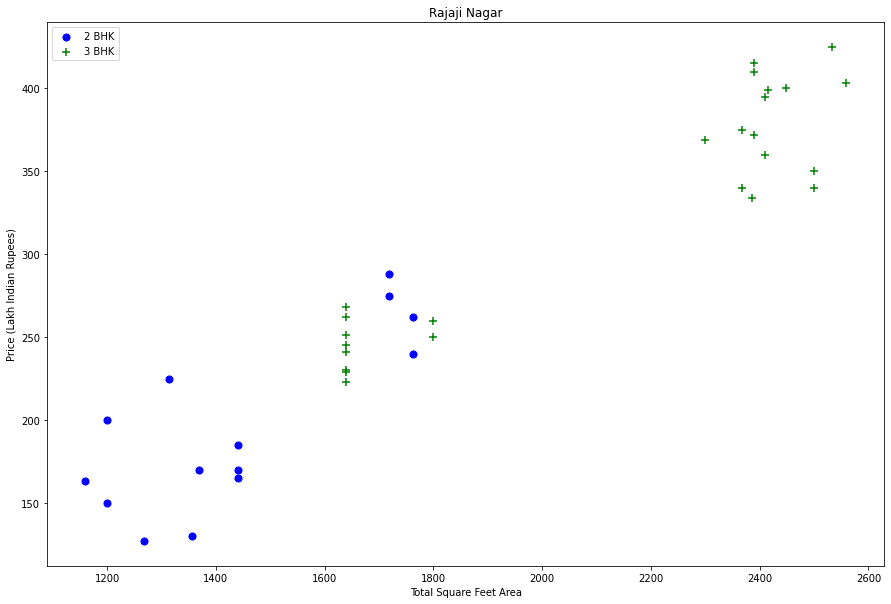

In [57]:
plot_scatter_chart(df8,"Rajaji Nagar")

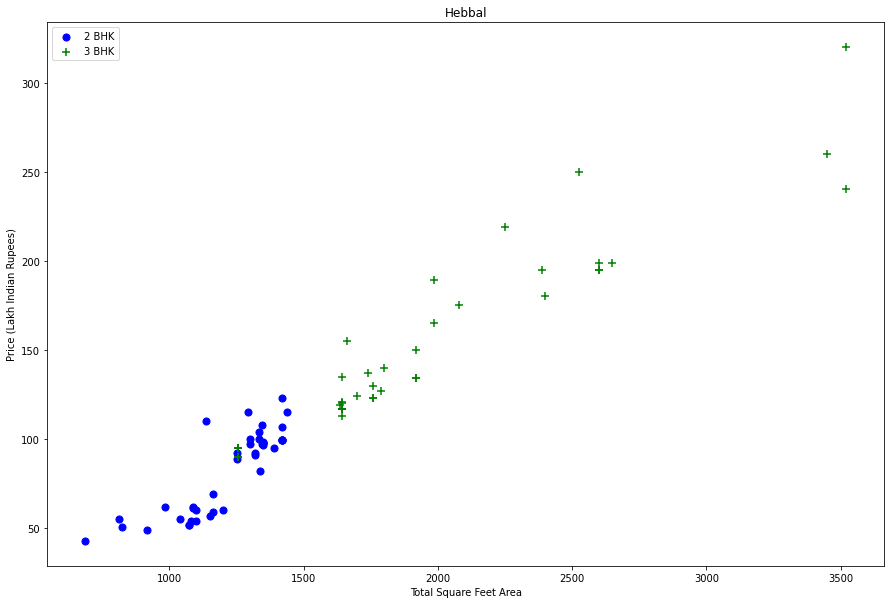

In [58]:
plot_scatter_chart(df8,"Hebbal")

Based on above scatterplots, I see that data points that were termed as outliers have been removed due to remove_bhk_outliers function.

Text(0, 0.5, 'Count')

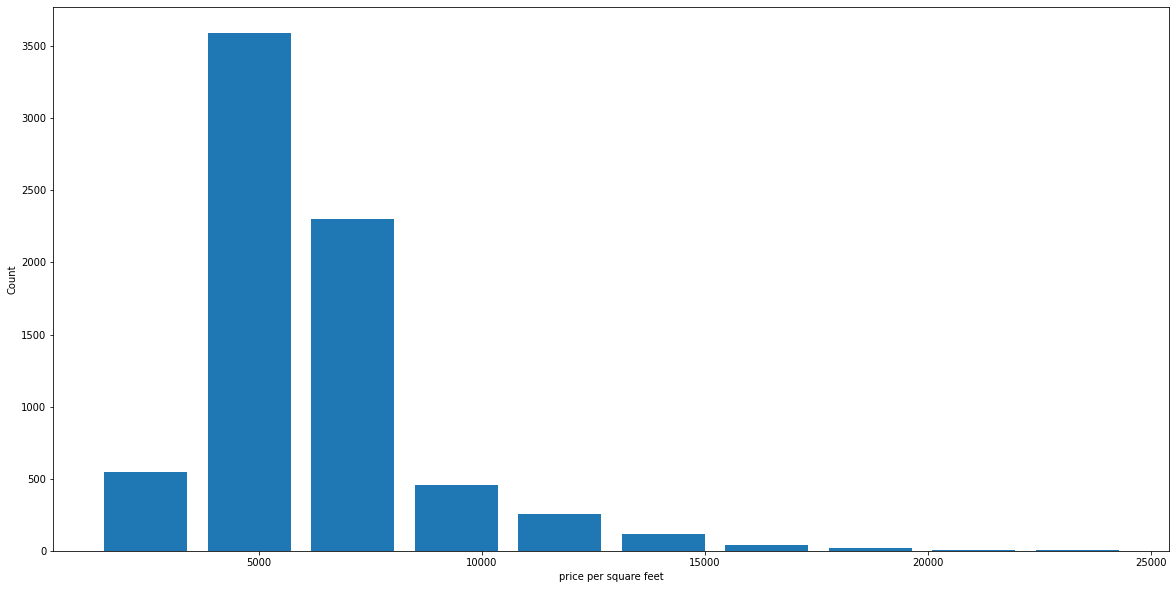

In [59]:
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("price per square feet")
plt.ylabel("Count")


In [60]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [61]:
df8.bath.describe()

count    7330.000000
mean        2.452115
std         1.014810
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: bath, dtype: float64

Text(0, 0.5, 'Count')

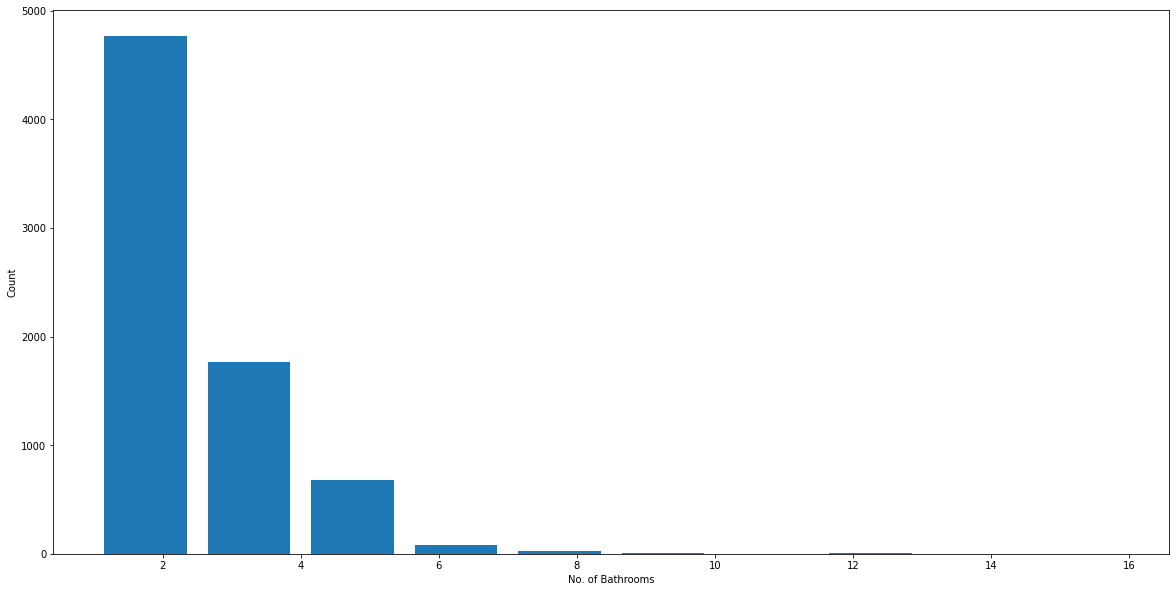

In [62]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")

In [63]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8487,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8576,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9640,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is very unusual to have 2 bathrooms more than the no. of bedrooms in a house. We need to remove these kind of outliers as well.

In [64]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6712,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8412,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


As per the domain knowledge, if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [65]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7252, 7)

In [66]:
df9.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Now our dataset is more or less clean and ready to be trained for Machine Learning model building step so we can drop some unnecessary features like size because we have bhk column and price_per_sqft as well because that was used just for outlier detection.

In [67]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Now we move on to one hot encoding.

In [68]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12 = df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model Building

In [71]:
df12.shape

(7252, 245)

In [72]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X.shape

(7252, 244)

In [74]:
Y = df12.price
Y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [76]:
X_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
853,1115.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3538,2400.0,6.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2077,865.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7354,3200.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2966,1718.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1139.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4293,1495.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1623,950.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5720,6000.0,8.0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X_test

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6743,1418.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,3000.0,4.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1857,1695.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9661,400.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6857,1045.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,1255.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9274,925.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,1153.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2707,1243.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
Y_train

853      65.12
3538    475.00
2077     40.00
7354    224.00
2966    119.00
         ...  
1424     60.00
4293    110.00
1623     40.00
5720    215.00
1562     35.00
Name: price, Length: 5801, dtype: float64

In [79]:
Y_test

6743    104.00
2407    375.00
1857    125.00
9661     50.00
6857     45.00
         ...  
3435     69.00
9274     70.00
3275     65.00
2707     46.00
1342     31.48
Name: price, Length: 1451, dtype: float64

In [80]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8548891629442537

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.81898176, 0.83782426, 0.84550572, 0.8434888 , 0.88786537])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [82]:
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'XGB': 
        {
            'model': XGBRegressor(),
            'params': 
            {
                'max_depth': [5],
                'learning_rate': [0.5], 
                'n_estimators': [600]
            }
        },
        
        'Ridge':
        {
            'model': Ridge(),
            'params': 
            {
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                'normalize': [True, False],
                'max_iter': [10,100,1000],
                'tol': [0.001, 0.01, 0.1],
            }
        },
        
        'Linear_Regression' : 
        {
            'model': LinearRegression(),
            'params': 
            {
                'normalize': [True, False]
            }
        },

        'Random_Forest':
        {
            'model': RandomForestRegressor(),
            'params':
            {
                'n_estimators': [500]
            }
        },

        'KNN':
        {
            'model': KNeighborsRegressor(),
            'params': 
            {
                'n_neighbors': [9],
                'weights': ['distance']
            }
        },

        'Decision_Tree': 
        {
            'model': DecisionTreeRegressor(),
            'params': 
            {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },

        'SVR': 
        {
            'model': SVR(),
            'params': 
            {
                'C': [1000],
                'gamma': [0.01, 0.1, 1, 10, 100]
            }
        },

        'Lasso': 
        {
            'model': Lasso(),
            'params': 
            {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        print("Running algorithm...")
        print(algo_name)
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

Running algorithm...
XGB
Running algorithm...
Ridge
Running algorithm...
Linear_Regression
Running algorithm...
Random_Forest
Running algorithm...
KNN
Running algorithm...
Decision_Tree
Running algorithm...
SVR
Running algorithm...
Lasso


,model,best_score,best_params
0,XGB,0.853616,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti..."
1,Ridge,0.819042,"{'alpha': 0.1, 'max_iter': 10, 'normalize': Fa..."
2,Linear_Regression,0.818982,{'normalize': True}
3,Random_Forest,0.789667,{'n_estimators': 500}
4,KNN,0.721473,"{'n_neighbors': 9, 'weights': 'distance'}"
5,Decision_Tree,0.699045,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
6,SVR,0.704478,"{'C': 1000, 'gamma': 0.01}"
7,Lasso,0.676650,"{'alpha': 1, 'selection': 'random'}"


Since XGB has performed better than the other models, we will choose XGB Regressor model for our training.

In [83]:
finalmodel = XGBRegressor(max_depth = 5, learning_rate = 0.5, n_estimators = 600, random_state = 0)
finalmodel.fit(X_train, Y_train)
finalmodel.score(X_test, Y_test)

0.6135128780847661

Now we will test the model for all the given properties in the cleaned table.

In [84]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [85]:
Y_pred1 = finalmodel.predict(X_test)
Y_pred1

array([104.02765 , 375.20248 , 138.9065  , ...,  50.466454,  48.40121 ,
        30.828794], dtype=float32)

In [86]:
Y_pred2 = finalmodel.predict(X_train)
Y_pred2

array([ 63.172207, 481.8115  ,  40.79605 , ...,  38.90265 , 211.3478  ,
        34.624645], dtype=float32)

In [87]:
def predict_price(location,sqft,bath,bhk):   
    df_test = pd.DataFrame(columns = X_test.columns) 
    df_test.loc[1,'total_sqft'] = sqft
    df_test.loc[1,'bath'] = bath
    df_test.loc[1,'bhk'] = bhk
    df_test.iloc[:,3:] = 0
    df_test.loc[1,location] = 1
    df_test = df_test.astype('int')
    convert_dict = {
        'total_sqft': float,'bath': float, 'bhk': int
    }  
    df_test = df_test.astype(convert_dict)
    return(finalmodel.predict(df_test))

In [88]:
print('Predicted Price:',predict_price('1st Phase JP Nagar', 1000.0, 4.0, 3))

Predicted Price: [90.51897]
